# Skill Vertex - Mini Project
* **Mentor:** Soumya Ma'am

* **Submitted by:** Siddharth Shankar Das

* **Date:** 5th July 2022




###  **Project Topic:** Loan Prediction

In [1]:
#Step 1, importing libraries
import  pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 

#ML algos to create the Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Loading our data, 

DataSet link: 
* https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/, 
* https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

In [12]:
data_trn=pd.read_csv("C:/Users/SSD/VITc_SSD1125_Progms/Training SkillVertex_py/MinProj/LoanPred_train.csv")

In [13]:
data_trn

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
data_trn.shape

(614, 13)

In [16]:
data_trn.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [17]:
data_trn.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
# Test data
data_tst=pd.read_csv('C:/Users/SSD/VITc_SSD1125_Progms/Training SkillVertex_py/MinProj/LoanPred_test.csv')

In [19]:
print (data_trn.shape, data_tst.shape)

(614, 13) (367, 12)


# Exploratory Data Analysis

In [20]:
data_trn.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
data_tst.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [22]:
# Checking for any null NaN values
data_trn.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
data_trn.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
data_trn.isnull().sum().sum()

149

### Interference: 
It can be observed that there are null values, so Removing them, later we'll instead add the Mode values

In [26]:
data_trn1=data_trn.dropna()

In [27]:
data_trn1.isnull().sum().sum()

0

In [25]:
data_tst.isnull().sum().sum()

84

In [33]:
data_trn.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status          category
dtype: object

In [38]:
#Converting the 'object' datatypes, into 'category'
dat=data_trn
dat['Loan_Status']=dat['Loan_Status'].astype("category")
dat.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status          category
dtype: object

In [50]:
### Visualization
import seaborn as sns
sns.set_style("whitegrid")
#sns.pairplot(data_trn[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]],hue="smoker",height=3,palette="Set1")

# Data Visualization

Observing the frequency of each Features

In [41]:
data = [data_trn,data_tst]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    # Exclude ID cols and source:
    categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID' ]]
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (data_trn[col].value_counts())


Frequency of Categories for variable Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency of Categories for variable Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency of Categories for variable Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of Categories for variable Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of Categories for variable Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of Categories for variable Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


C:\Users\SSD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

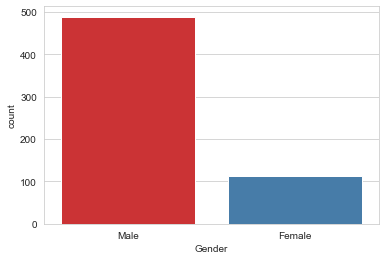

In [49]:
import seaborn as sns
sns.countplot(data_trn['Gender'],palette = "Set1")
plt.show

In [52]:
pd.crosstab(data_trn.Gender, data_trn.Loan_Status, margins = True)
# Seeing the approval of loans b/w Males & Females

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [53]:
print("Original data shape: ",data_trn.shape)
print("Removad Na data shape: ",data_trn1.shape)

Original data shape:  (614, 13)
Removad Na data shape:  (480, 13)


It can be observed that 134 reading are being dropped, when we directly remove the NaN, which may decrease the Accuracy of our model. 
So, we'll add the Mode in those Null values.

In [137]:
data_trn=pd.read_csv("C:/Users/SSD/VITc_SSD1125_Progms/Training SkillVertex_py/MinProj/LoanPred_train.csv")

In [138]:
data_tst=pd.read_csv("C:/Users/SSD/VITc_SSD1125_Progms/Training SkillVertex_py/MinProj/LoanPred_test.csv")

In [139]:
data_t=data_trn
dtest=data_tst
data_t.Gender = data_t.Gender.fillna(data_t.Gender.mode())
dtest.Gender = dtest.Gender.fillna(dtest.Gender.mode())

In [141]:
#Converting 'M', 'F'(i.e., Categorical Var) to, (0,1)numerical variables
gendr=pd.get_dummies(data_t['Gender'] , drop_first = True )
data_t.drop(['Gender'], axis = 1 , inplace =True)
data_t = pd.concat([data_t , gend ] , axis = 1)
# For test
gendr1 = pd.get_dummies(dtest['Gender'] , drop_first = True )
dtest.drop(['Gender'], axis = 1 , inplace =True)
dtest = pd.concat([dtest , gendr1 ] , axis = 1)

In [143]:
data_t.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Male
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [144]:
data_t.isnull().sum()

Loan_ID               0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Male                  0
dtype: int64

# Now, filling the 'Married','Dependantas', 'Self_Employed', 'Credit_History', etc values with the Mode values.

C:\Users\SSD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

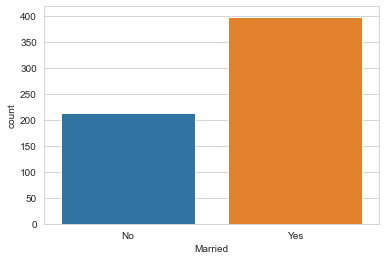

In [145]:
# For, Married column, 
sns.countplot(data_t.Married)

In [146]:
# Checking approval rate
pd.crosstab(data_t.Married , data_t.Loan_Status,margins = True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


In [147]:
# Now, filling the NaN values with Mode
data_t.Married = data_t.Married.fillna(data_t.Married.mode())
dtest.Married = dtest.Married.fillna(dtest.Married.mode())

married = pd.get_dummies(data_t['Married'] , prefix = 'married',drop_first = True )
data_t.drop(['Married'], axis = 1 , inplace =True)
data_t = pd.concat([data_t , married ] , axis = 1)

married = pd.get_dummies(dtest['Married'] , prefix = 'married', drop_first = True )
dtest.drop(['Married'], axis = 1 , inplace =True)
dtest = pd.concat([dtest , married ] , axis = 1)

In [150]:
# Visualizing No. of dependents
depnd=data_trn['Dependents']
depnd.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

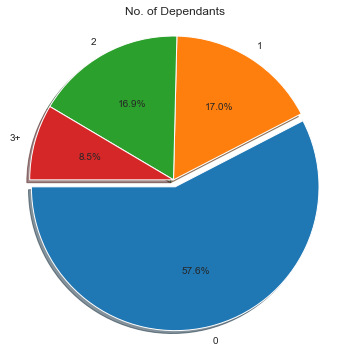

In [151]:
plt.figure(figsize=(6,6))
explode = (0.05, 0, 0, 0)
labels = ['0' , '1', '2' , '3+']
size = [345 , 102 , 101 , 51]

plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow = True, startangle = 180)
plt.axis('equal')
plt.title('No. of Dependants')
plt.show()

In [152]:
print("Approval of loans b/w diff. sizes of families")
pd.crosstab(data_t.Dependents , data_t.Loan_Status, margins = True)

Approval of loans b/w diff. sizes of families


Loan_Status,N,Y,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599


In [153]:
# Filling the NaN Values
data_t.Dependents = data_t.Dependents.fillna("0")
dtest.Dependents = dtest.Dependents.fillna("0")
# Converting categorial to Numerical variables
size = {'0':'0', '1':'1', '2':'2', '3+':'3'}

data_t.Dependents = data_t.Dependents.replace(size).astype(int)
dtest.Dependents = dtest.Dependents.replace(size).astype(int)

C:\Users\SSD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

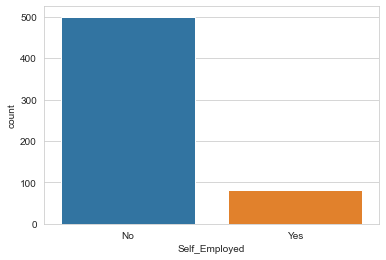

In [154]:
# For self employed
sns.countplot(data_t['Self_Employed'])

In [155]:
pd.crosstab(data_t.Self_Employed , data_t.Loan_Status,margins = True)

Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


In [157]:
data_t.Self_Employed = data_t.Self_Employed.fillna(data_t.Self_Employed.mode())
dtest.Self_Employed = dtest.Self_Employed.fillna(dtest.Self_Employed.mode())

self_Employed = pd.get_dummies(data_t['Self_Employed'] ,prefix = 'employed' ,drop_first = True )
data_t.drop(['Self_Employed'], axis = 1 , inplace =True)
data_t = pd.concat([data_t , self_Employed ] , axis = 1)

self_Employed = pd.get_dummies(dtest['Self_Employed'] , prefix = 'employed' ,drop_first = True )
dtest.drop(['Self_Employed'], axis = 1 , inplace =True)
dtest = pd.concat([dtest , self_Employed ] , axis = 1)

In [158]:
# For Loan amt term
data_t.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)
dtest.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)

data_t.LoanAmount = data_t.LoanAmount.fillna(data_t.LoanAmount.mean()).astype(int)
dtest.LoanAmount = dtest.LoanAmount.fillna(dtest.LoanAmount.mean()).astype(int)

C:\Users\SSD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

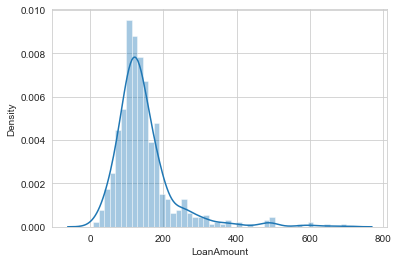

In [159]:
sns.distplot(data_t['LoanAmount'])
# It can be onserver that there are no outliners

C:\Users\SSD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

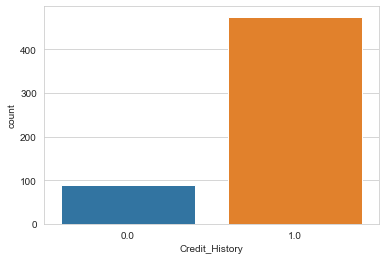

In [160]:
# For, Credit Histrory
sns.countplot(data_t['Credit_History'])

In [161]:
# CHecking the no. of people who have Credit history or not
pd.crosstab(data_t.Credit_History , data_t.Loan_Status, margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [162]:
# Removing the NaN values, and adding the Mode insted
data_t.Credit_History = data_t.Credit_History.fillna(data_t.Credit_History.mode()[0])
dtest.Credit_History  = dtest.Credit_History.fillna(dtest.Credit_History.mode()[0])

C:\Users\SSD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

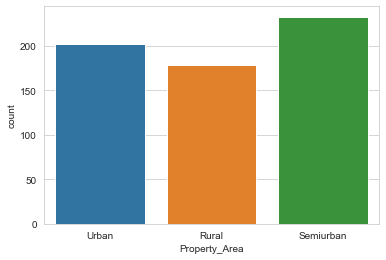

In [166]:
## Observing the Property Area
sns.countplot(data_t.Property_Area)

In [167]:
# Converting to Numerical variables, to better train our models
data_t['Property_Area'] = data_t['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

dtest.Property_Area = dtest.Property_Area.fillna(dtest.Property_Area.mode())
dtest['Property_Area'] = dtest['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

C:\Users\SSD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Applicants Income')

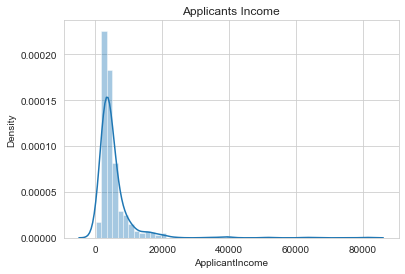

In [170]:
sns.distplot(data_t['ApplicantIncome'])
plt.title("Applicants Income")

C:\Users\SSD\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

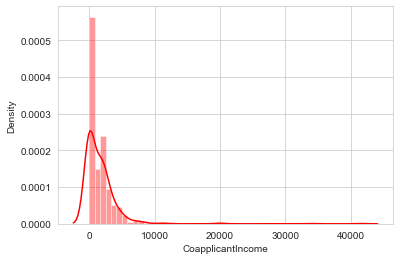

In [171]:
sns.distplot(data_t['CoapplicantIncome'],color="r")

### Observing the Education Column

C:\Users\SSD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

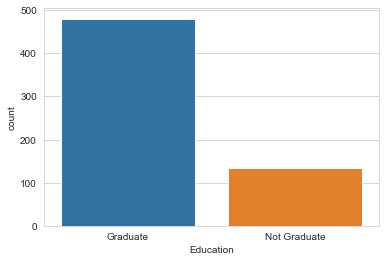

In [163]:
sns.countplot(data_t.Education)

In [164]:
# Converting to Numerical variables, to better train our models
data_t['Education'] = data_t['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)
dtest['Education'] = dtest['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)

In [173]:
# Converting our Dependent/Target variable, from Categorial to Numerical
data_t['Loan_Status'] = data_t['Loan_Status'].map( {'N': 0, 'Y': 1 } ).astype(int)

In [175]:
data_t.dtypes

Loan_ID               object
Dependents             int32
Education              int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int32
Credit_History       float64
Property_Area          int32
Loan_Status            int32
Male                   uint8
married_Yes            uint8
employed_Yes           uint8
dtype: object

<AxesSubplot:>

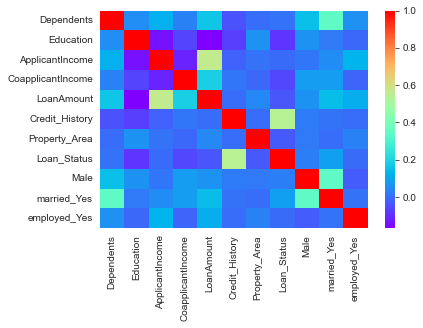

In [184]:
sns.heatmap(data_t.corr(),cmap='rainbow')

##  Correlation between the explanatory variables and the response/target variable(y)

In [192]:
y=data_t['employed_Yes']
d=data_t[["Dependents","Education","ApplicantIncome","CoapplicantIncome","LoanAmount","Credit_History","Property_Area","Loan_Status","Male","employed_Yes"]]
d.corr()['employed_Yes']

Dependents           0.056798
Education           -0.010383
ApplicantIncome      0.127180
CoapplicantIncome   -0.016100
LoanAmount           0.115259
Credit_History      -0.001550
Property_Area        0.030860
Loan_Status         -0.003700
Male                -0.027421
employed_Yes         1.000000
Name: employed_Yes, dtype: float64

In [193]:
#In sorted order, for our convenience 
d.corr()["employed_Yes"].abs().sort_values(ascending=False)

employed_Yes         1.000000
ApplicantIncome      0.127180
LoanAmount           0.115259
Dependents           0.056798
Property_Area        0.030860
Male                 0.027421
CoapplicantIncome    0.016100
Education            0.010383
Loan_Status          0.003700
Credit_History       0.001550
Name: employed_Yes, dtype: float64

##### From above, It can be oberved that, althoug negligible, but still all are correlated to the Dependent variable.
So, removing the insisgnificant varaible, 'Loan_ID', and checking the signigficance of Credit HIstory, 

<AxesSubplot:xlabel='Credit_History'>

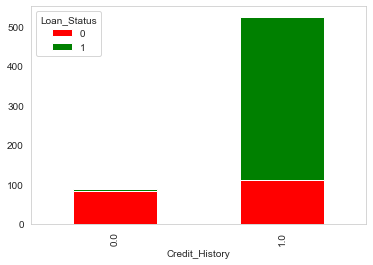

In [202]:
lc = pd.crosstab(data_t['Credit_History'], data_t['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','green'], grid=False)
# It can be observed that Credit history is related, so not removing it

In [195]:
data_t.drop(['Loan_ID'], axis = 1 , inplace =True)

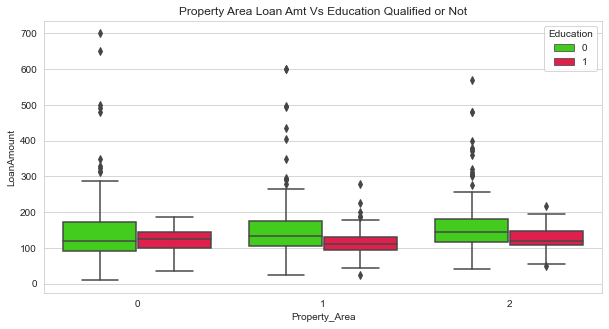

In [199]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=data_t, palette="prism")
plt.title("Property Area Loan Amt Vs Education Qualified or Not")
plt.show()

<AxesSubplot:>

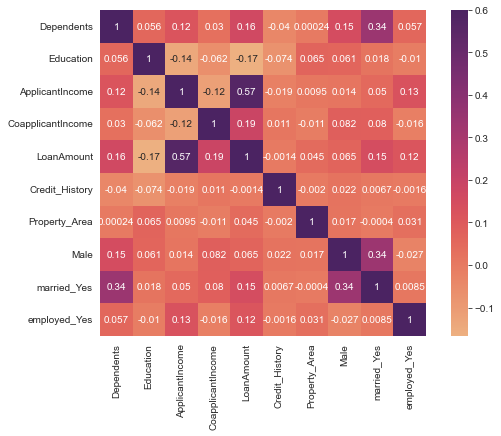

In [206]:
plt.figure(figsize=(9,6))
sns.heatmap(data_t.drop('Loan_Status',axis=1).corr(), vmax=0.6, square=True, annot=True, cmap='flare')

# Building a Model

In [224]:
# Since it's classification problem(0,1)
#Firstly trying only one the train data
from sklearn.model_selection import train_test_split 
X = data_t.drop('Loan_Status' , axis = 1 )
y = data_t['Loan_Status']
#20% train data
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state =10)

In [482]:
#Building the model, firstly we'll use Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train , y_train)

LogisticRegression()

### Step 6: Model Evaluation

In [226]:
pred1 = logreg.predict(X_test)
acc_log = accuracy_score(y_test , pred1)*100
acc_log

79.67479674796748

In [227]:
logreg.score(X_test,y_test).round(3)
#It's not bad, but not that good

0.797

In [232]:
# Trying different Train test split
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state =10)

In [233]:
pred1 = logreg.predict(X_test)
acc_log = accuracy_score(y_test , pred1)*100
acc_log

81.16883116883116

### Still, not that better accuracy, so Normalizing it, to increase the accuracy
Trying with MinMax

In [251]:
# Normalization method used - sklern library and MinMaxScaler()
from sklearn import preprocessing
normalised = preprocessing.MinMaxScaler().fit_transform(data_t)
data1 = pd.DataFrame(normalised, columns = data_t.columns)
data1.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Male,married_Yes,employed_Yes
0,0.000000,0.0,0.070489,0.000000,0.198263,1.0,0.0,1.0,1.0,0.0,0.0
1,0.333333,0.0,0.054830,0.036192,0.172214,1.0,1.0,0.0,1.0,1.0,0.0
2,0.000000,0.0,0.035250,0.000000,0.082489,1.0,0.0,1.0,1.0,1.0,1.0
3,0.000000,1.0,0.030093,0.056592,0.160637,1.0,0.0,1.0,1.0,1.0,0.0
4,0.000000,0.0,0.072356,0.000000,0.191027,1.0,0.0,1.0,1.0,0.0,0.0


In [253]:
x=data1.drop('employed_Yes',axis=1)
y=data1['employed_Yes']

In [256]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
model2=LogisticRegression()
model2.fit(x_train,y_train)
y_predicted2=model2.predict(x_test)
accuracy_score(y_test,y_predicted2)

0.8373983739837398

In [258]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(x_train, y_train)
pred_rf = random_forest.predict(x_test)
acc_rf = accuracy_score(y_test , pred_rf)*100
acc_rf

82.92682926829268

### Still not that better even with Random Forest, 



#### Now, Trying another pre-processing technique

In [321]:
df=data_t
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df['Male']=le.fit_transform(df['Male'])
df['married_Yes']=le.fit_transform(df['married_Yes'])
df['Education']=le.fit_transform(df['Education'])
#df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['employed_Yes']=le.fit_transform(df['employed_Yes'])
df

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Male,married_Yes,employed_Yes
0,0,0,5849,0.0,146,1.0,0,1,1,0,0
1,1,0,4583,1508.0,128,1.0,2,0,1,1,0
2,0,0,3000,0.0,66,1.0,0,1,1,1,1
3,0,1,2583,2358.0,120,1.0,0,1,1,1,0
4,0,0,6000,0.0,141,1.0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,2900,0.0,71,1.0,2,1,0,0,0
610,3,0,4106,0.0,40,1.0,2,1,1,1,0
611,1,0,8072,240.0,253,1.0,0,1,1,1,0
612,2,0,7583,0.0,187,1.0,0,1,1,1,0


In [322]:
df.reset_index(inplace=True)

In [323]:
df.drop('index',axis=1,inplace=True)
df

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Male,married_Yes,employed_Yes
0,0,0,5849,0.0,146,1.0,0,1,1,0,0
1,1,0,4583,1508.0,128,1.0,2,0,1,1,0
2,0,0,3000,0.0,66,1.0,0,1,1,1,1
3,0,1,2583,2358.0,120,1.0,0,1,1,1,0
4,0,0,6000,0.0,141,1.0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,2900,0.0,71,1.0,2,1,0,0,0
610,3,0,4106,0.0,40,1.0,2,1,1,1,0
611,1,0,8072,240.0,253,1.0,0,1,1,1,0
612,2,0,7583,0.0,187,1.0,0,1,1,1,0


In [324]:
x=df.drop('employed_Yes',axis=1)
y=df['employed_Yes']

In [366]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.20)
model11=LogisticRegression()
model11.fit(x_train1,y_train1)
y_predicted11=model11.predict(x_test1)
from sklearn.metrics import accuracy_score
acc_log1=accuracy_score(y_test1,y_predicted11)
acc_log1

0.8699186991869918

In [341]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [342]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [343]:
y_predicted1=model1.predict(x_test)

In [312]:
from sklearn.metrics import accuracy_score
acc_log=accuracy_score(y_test,y_predicted1)
acc_log

0.8702702702702703

### KNN

In [358]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
acc_knn = accuracy_score(y_test , pred_knn)*100
acc_knn

86.99186991869918

### Checking with other neighbours, to get the best KNN accuracy

In [367]:
for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train1, y_train1)
    pred_knn = knn.predict(x_test1)
    acc_knn = accuracy_score(y_test1 , pred_knn)*100
    print("Neighbours: ",i,", Accuracy: ",acc_knn)

Neighbours:  1 , Accuracy:  82.11382113821138
Neighbours:  2 , Accuracy:  88.6178861788618
Neighbours:  3 , Accuracy:  87.8048780487805
Neighbours:  4 , Accuracy:  86.99186991869918
Neighbours:  5 , Accuracy:  86.99186991869918
Neighbours:  6 , Accuracy:  86.99186991869918
Neighbours:  7 , Accuracy:  86.99186991869918
Neighbours:  8 , Accuracy:  86.99186991869918
Neighbours:  9 , Accuracy:  87.8048780487805
Neighbours:  10 , Accuracy:  88.6178861788618
Neighbours:  11 , Accuracy:  88.6178861788618


## Naive Bayes

In [369]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train1, y_train1)
pred_gb = gaussian.predict(x_test1)
acc_nb = accuracy_score(y_test1 , pred_gb)*100
acc_nb

84.5528455284553

# Random Forest

In [345]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators= 100)
rf_model.fit(x_train1, y_train1)
pred_rf = rf_model.predict(x_test1)
acc_rf = accuracy_score(y_test1 , pred_rf)*100
acc_rf

92.6829268292683

In [375]:
gbk = GradientBoostingClassifier()
gbk.fit(x_train1, y_train1)
pred_gbc = gbk.predict(x_test1)
acc_gbc = accuracy_score(y_test1 , pred_gbc)*100
acc_gbc

86.1788617886179

## SVM

In [371]:
svc = SVC()
svc.fit(x_train1, y_train1)
pred_svm = svc.predict(x_test1)
acc_svm = accuracy_score(y_test1 , pred_svm)*100
acc_svm

87.8048780487805

In [387]:
## Accuracy Results, best to worst
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'K- Nearest Neighbour' ,'Naive Bayes' ,
              'Random Forrest','Gradient Boosting Classifier', 'SVM',],
    'Score': [acc_log , acc_knn , acc_nb, acc_rf, acc_gbc ,acc_svm]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forrest,91.869919
1,K- Nearest Neighbour,88.617886
5,SVM,87.804878
0,Logistic Regression,87.027027
4,Gradient Boosting Classifier,86.178862
2,Naive Bayes,84.552846


In [389]:
# Checking the importance of each Columns
importances = pd.DataFrame({'Features':x_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11) 

,Importance
Features,
ApplicantIncome,0.335
LoanAmount,0.257
CoapplicantIncome,0.137
Dependents,0.069
Property_Area,0.060
married_Yes,0.037
Loan_Status,0.030
Education,0.028
Male,0.027


<AxesSubplot:xlabel='Features'>

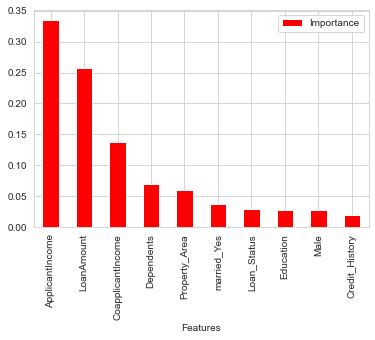

In [391]:
importances.plot.bar(color='red')

Text(0, 0.5, 'Score')

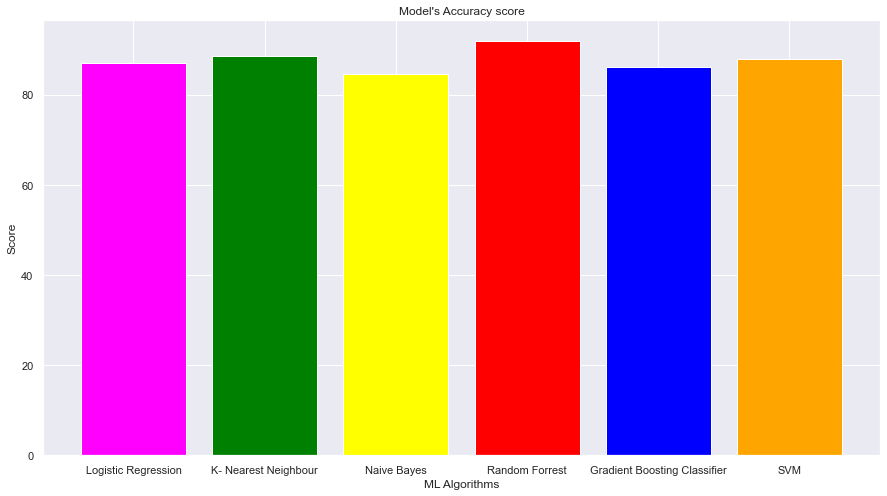

In [393]:
nam=['Logistic Regression', 'K- Nearest Neighbour', 'Naive Bayes', 'Random Forrest','Gradient Boosting Classifier', 'SVM']
val=[acc_log , acc_knn , acc_nb, acc_rf, acc_gbc ,acc_svm]
sns.set(rc={'figure.figsize':(15,8)})
plt.bar(nam,val,color=["magenta","green","yellow","red","blue","orange"])
plt.xlabel("ML Algorithms")
plt.title("Model's Accuracy score")
plt.ylabel("Score")

### From the above bar plot, We can conclude that, 
* Random Foest performed the best for our model.
* And, Naive Bayes was not that accurate as compared to the others

# Conclusion:
* We were successfully able to create an accurate model with somewhat a great accuracy of 92%.
* We have even compared many ML models, and found that Random Forest worked best for this case.
* This model can be very useful for real life Loan allowance scenarios, and so, We have save it.
* The model has been used in the later part of this pdf/pynb file.

In [468]:
# Saving our best model
import pickle
filename = 'ssd_rf_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

# for loading the model from disk
"""
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
"""

"\nloaded_model = pickle.load(open(filename, 'rb'))\nresult = loaded_model.score(X_test, Y_test)\n"

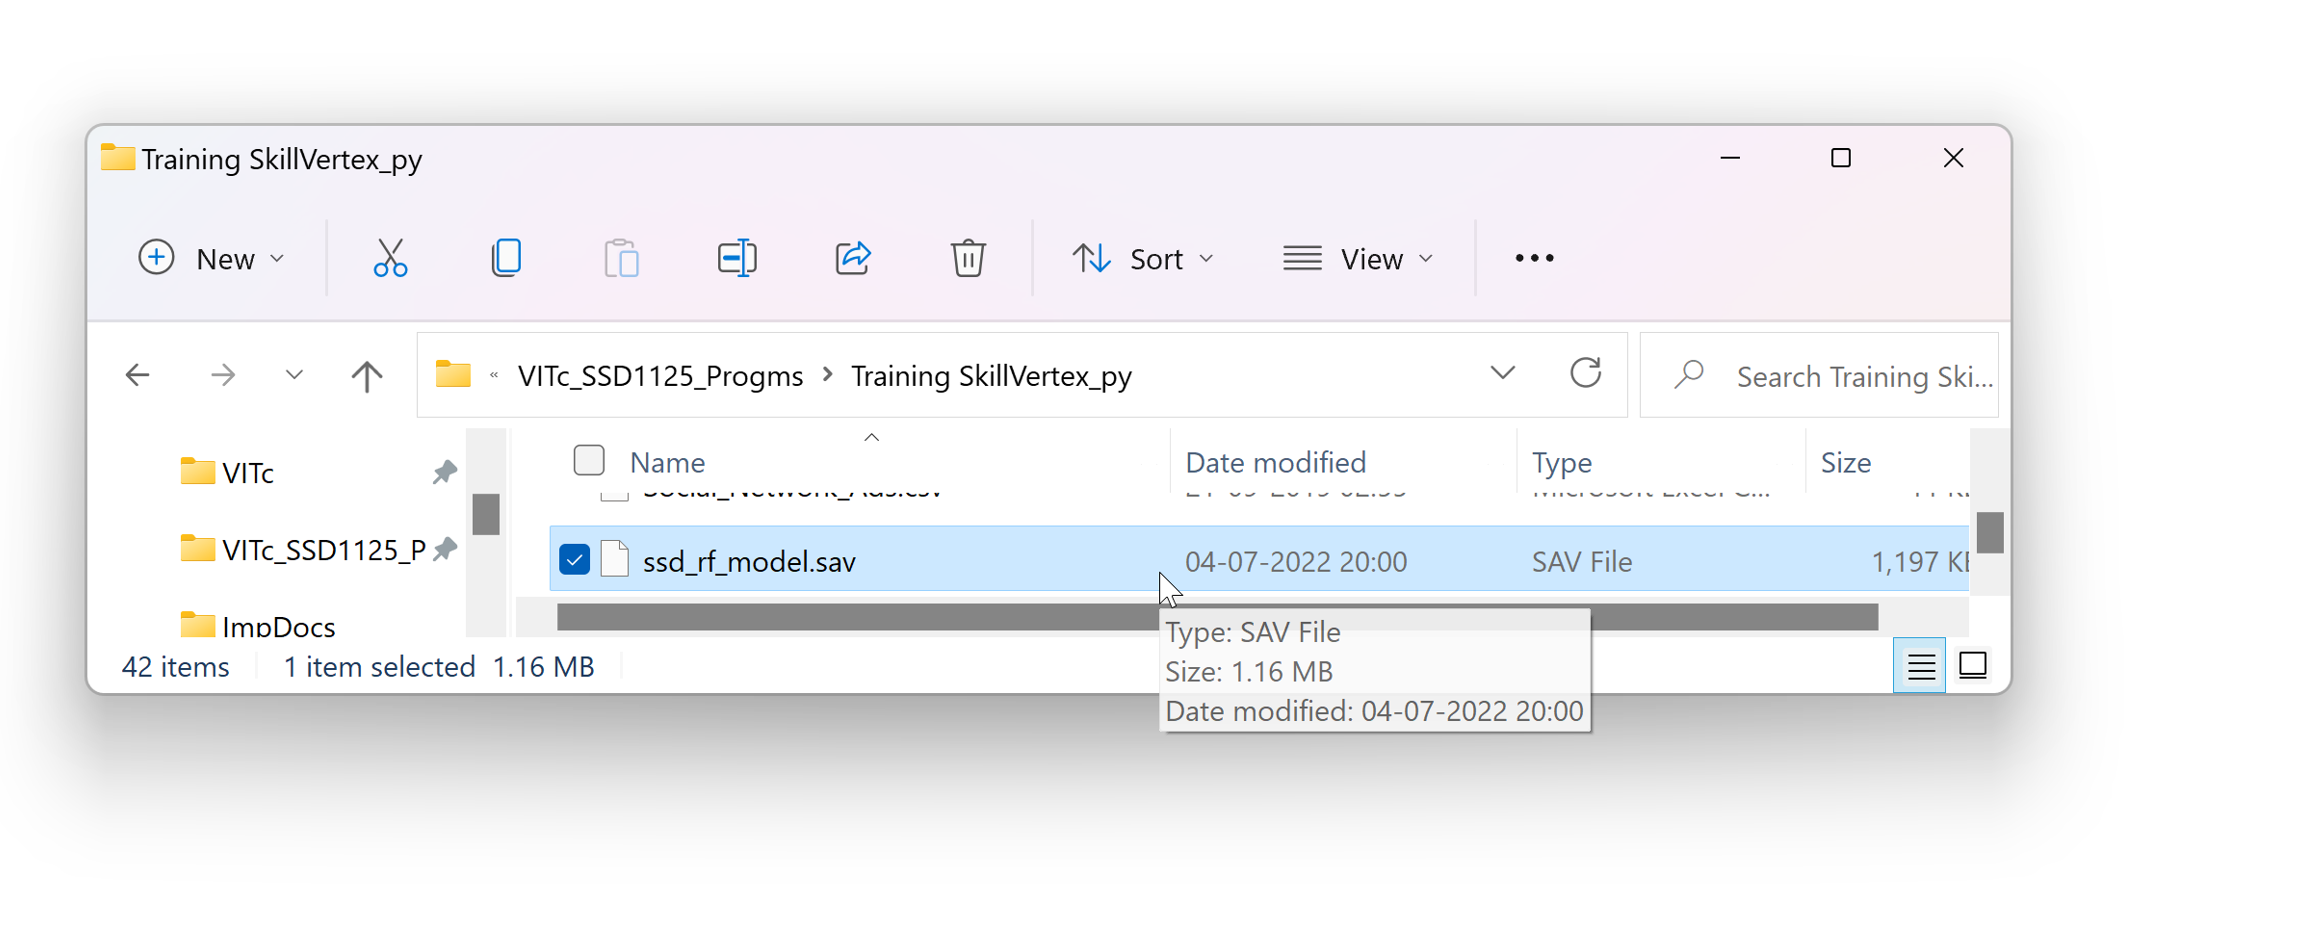

# Predicting the Loan approval Prediction for a Customer

In [408]:
Factors=[0]*x.shape[1]
np.array(Factors)
colm=np.array(x.columns)
Factors

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [409]:
#print("Welcome to SSD's🏦Bank 💸")
#print("Kinkly enter the details to ")
for i in range(0, x.shape[1]):
    Factors[i]=int(input(print(f'Enter the value for',colm[i] ,": ")))
Factors=np.reshape(Factors,[1,10])
customer= pd.DataFrame(Factors, index=range(1), columns=x.columns)
loan_Status=rf_model.predict(customer)
if loan_Status[0]==1:
    print('\n\n Congratulations: The Loan is approved for you')
else:
    print('\n\n Sorry: The Loan is not approved for you')

Enter the value for Dependents : 
None1
Enter the value for Education : 
None1
Enter the value for ApplicantIncome : 
None456389
Enter the value for CoapplicantIncome : 
None82726
Enter the value for LoanAmount : 
None100
Enter the value for Credit_History : 
None10
Enter the value for Property_Area : 
None231
Enter the value for Loan_Status : 
None0
Enter the value for Male : 
None0
Enter the value for married_Yes : 
None1


 Congratulations: The Loan is approved for you


### For our comfort, making the columns more understandable

In [452]:
# For our comfort, making the columns more understandable
ssd=x
ssd.rename(columns={'Dependents':'No. Of Dependets🤝',
                    'Education':'Education🏫🎓(Graduated: 1, Not Graduated: 0)',
                    'Loan_Status':'Self_Employed🏢(0: No, 1: Yes)',
                    'Male':"Gender(Male👨: 1, Female👧: 0)",
                    'married_Yes':'Married💍(0 for No, 1 for Yes)'},inplace = True)
ssd

,No. Of Dependets🤝,"Education🏫🎓(Graduated: 1, Not Graduated: 0)",ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,"Self_Employed🏢(0: No, 1: Yes)","Gender(Male👨: 1, Female👧: 0)","Married💍(0 for No, 1 for Yes)"
0,0,0,5849,0.0,146,1.0,0,1,1,0
1,1,0,4583,1508.0,128,1.0,2,0,1,1
2,0,0,3000,0.0,66,1.0,0,1,1,1
3,0,1,2583,2358.0,120,1.0,0,1,1,1
4,0,0,6000,0.0,141,1.0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
609,0,0,2900,0.0,71,1.0,2,1,0,0
610,3,0,4106,0.0,40,1.0,2,1,1,1
611,1,0,8072,240.0,253,1.0,0,1,1,1
612,2,0,7583,0.0,187,1.0,0,1,1,1


In [459]:
Factors=[0]*ssd.shape[1]
np.array(Factors)
cols=np.array(x.columns)
org=df.drop('employed_Yes',axis=1)
Factors

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [463]:
print("Welcome to SSD's🏦Bank 💸")
print("Kindly enter the details to know if you are applicable for a loan or not.")
n=input("Enter your name: ")
for i in range(0, ssd.shape[1]):
    print("Enter the value for, ",cols[i],": ",end=" ")
    inf=int(input(": "))
    #Factors[i]=int(input(print(f'Enter the value for',colm[i] ,": ")))
    Factors[i]=inf
Factors=np.reshape(Factors,[1,10])
customer= pd.DataFrame(Factors, index=range(1), columns=org.columns)
# Predicting the output
loan_Status=rf_model.predict(customer)
if loan_Status[0]==1:
    print('\n Congratulations🥳',n,", The Loan is approved for you 👍")
else:
    print('\n Sorry 😔',n,", The Loan is not approved for you😓")

Welcome to SSD's🏦Bank 💸
Kindly enter the details to know if you are applicable for a loan or not.
Enter your name: SiddharthSD
Enter the value for,  No. Of Dependets🤝 :  : 2
Enter the value for,  Education🏫🎓(Graduated: 1, Not Graduated: 0) :  : 1
Enter the value for,  ApplicantIncome :  : 2500000
Enter the value for,  CoapplicantIncome :  : 100000
Enter the value for,  LoanAmount :  : 100000
Enter the value for,  Credit_History :  : 5
Enter the value for,  Property_Area :  : 320500
Enter the value for,  Self_Employed🏢(0: No, 1: Yes) :  : 1
Enter the value for,  Gender(Male👨: 1, Female👧: 0) :  : 1
Enter the value for,  Married💍(0 for No, 1 for Yes) :  : 0

 Congratulations🥳 SiddharthSD , The Loan is approved for you 👍


In [469]:
# Checking the model on another Real life situation

In [464]:
Factors=[0]*ssd.shape[1]
np.array(Factors)
cols=np.array(ssd.columns)
org=df.drop('employed_Yes',axis=1)

In [466]:
print("Welcome to SSD's🏦Bank 💸")
print("Kindly enter the details to know if you are applicable for a loan or not.")
n=input("Enter your name: ")
for i in range(0, ssd.shape[1]):
    print("Enter the value for, ",cols[i],": ",end=" ")
    inf=int(input(": "))
    #Factors[i]=int(input(print(f'Enter the value for',colm[i] ,": ")))
    Factors[i]=inf
Factors=np.reshape(Factors,[1,10])
customer= pd.DataFrame(Factors, index=range(1), columns=org.columns)
# Predicting the output
loan_Status=rf_model.predict(customer)
if loan_Status[0]==1:
    print('\n Congratulations🥳',n,", The Loan is approved for you 👍")
else:
    print('\n Sorry 😔',n,", The Loan is not approved for you😓")

Welcome to SSD's🏦Bank 💸
Kindly enter the details to know if you are applicable for a loan or not.
Enter your name: Amber
Enter the value for,  No. Of Dependets🤝 :  : 0
Enter the value for,  Education🏫🎓(Graduated: 1, Not Graduated: 0) :  : 0
Enter the value for,  ApplicantIncome :  : 1000
Enter the value for,  CoapplicantIncome :  : 0
Enter the value for,  LoanAmount :  : 103500000
Enter the value for,  Credit_History :  : 2
Enter the value for,  Property_Area :  : 100000
Enter the value for,  Self_Employed🏢(0: No, 1: Yes) :  : 0
Enter the value for,  Gender(Male👨: 1, Female👧: 0) :  : 0
Enter the value for,  Married💍(0 for No, 1 for Yes) :  : 0

 Sorry 😔 Amber , The Loan is not approved for you😓


In [470]:
def Loan_Predict_SSD():
    Factors=[0]*ssd.shape[1]
    np.array(Factors)
    cols=np.array(ssd.columns)
    org=df.drop('employed_Yes',axis=1)
    print("Welcome to SSD's🏦Bank 💸")
    print("Kindly enter the details to know if you are applicable for a loan or not.")
    n=input("Enter your name: ")
    for i in range(0, ssd.shape[1]):
        print("Enter the value for, ",cols[i],": ",end=" ")
        inf=int(input(": "))
        #Factors[i]=int(input(print(f'Enter the value for',colm[i] ,": ")))
        Factors[i]=inf
    Factors=np.reshape(Factors,[1,10])
    customer= pd.DataFrame(Factors, index=range(1), columns=org.columns)
    # Predicting the output
    loan_Status=rf_model.predict(customer)
    if loan_Status[0]==1:
        print('\n Congratulations🥳',n,", The Loan is approved for you 👍")
    else:
        print('\n Sorry 😔',n,", The Loan is not approved for you😓")

#### Showing how the Model/Project asks for input:
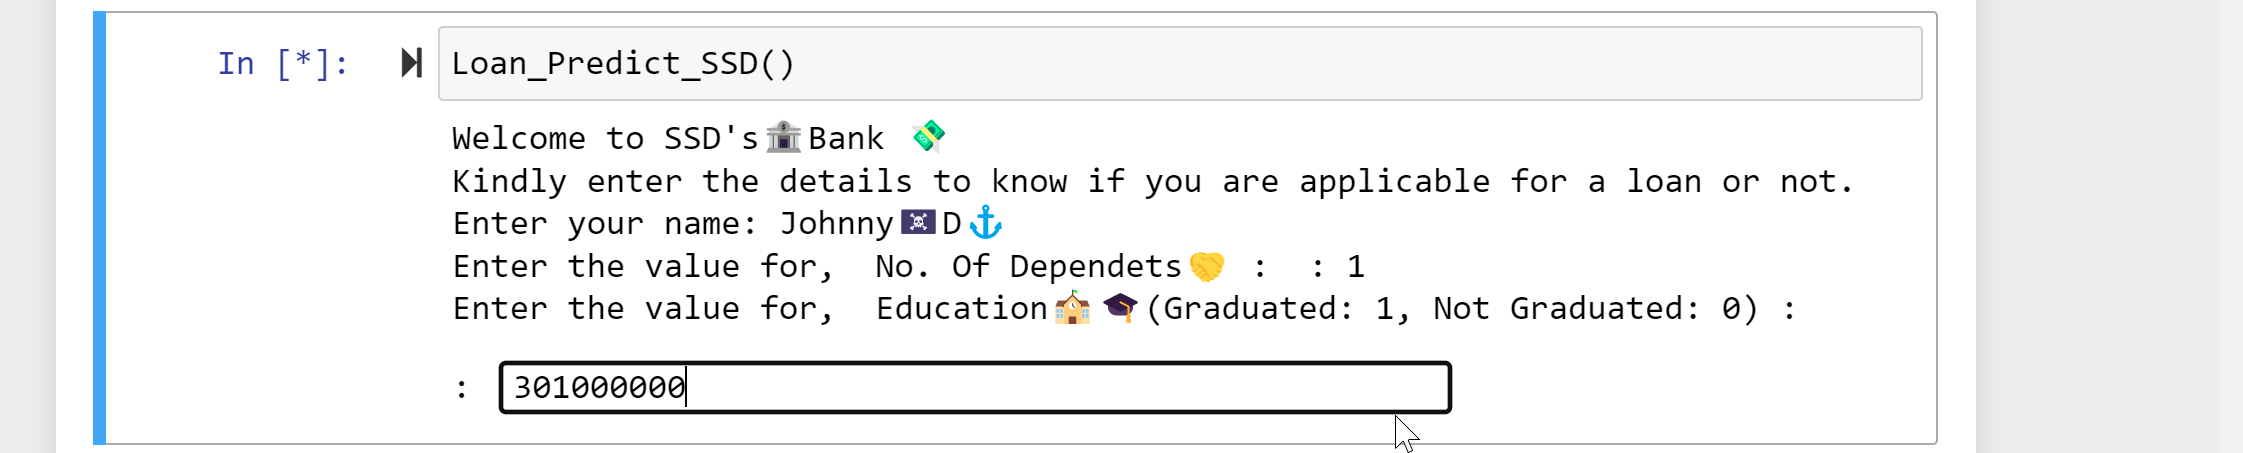

In [476]:
Loan_Predict_SSD()

Welcome to SSD's🏦Bank 💸
Kindly enter the details to know if you are applicable for a loan or not.
Enter your name: Johnny🏴‍☠️D⚓
Enter the value for,  No. Of Dependets🤝 :  : 2
Enter the value for,  Education🏫🎓(Graduated: 1, Not Graduated: 0) :  : 1
Enter the value for,  ApplicantIncome :  : 301000000
Enter the value for,  CoapplicantIncome :  : 100000
Enter the value for,  LoanAmount :  : 100
Enter the value for,  Credit_History :  : 5
Enter the value for,  Property_Area :  : 7460378
Enter the value for,  Self_Employed🏢(0: No, 1: Yes) :  : 1
Enter the value for,  Gender(Male👨: 1, Female👧: 0) :  : 1
Enter the value for,  Married💍(0 for No, 1 for Yes) :  : 0

 Congratulations🥳 Johnny🏴‍☠️D⚓ , The Loan is approved for you 👍


In [480]:
Loan_Predict_SSD()

Welcome to SSD's🏦Bank 💸
Kindly enter the details to know if you are applicable for a loan or not.
Enter your name: Elon🚀 M🦌⚡
Enter the value for,  No. Of Dependets🤝 :  : 0
Enter the value for,  Education🏫🎓(Graduated: 1, Not Graduated: 0) :  : 0
Enter the value for,  ApplicantIncome :  : 700000000000
Enter the value for,  CoapplicantIncome :  : 100000000000000000000
Enter the value for,  LoanAmount :  : 10000000000000000000000000000000000
Enter the value for,  Credit_History :  : 0
Enter the value for,  Property_Area :  : 123
Enter the value for,  Self_Employed🏢(0: No, 1: Yes) :  : 0
Enter the value for,  Gender(Male👨: 1, Female👧: 0) :  : 1
Enter the value for,  Married💍(0 for No, 1 for Yes) :  : 1

 Sorry 😔 Elon🚀 M🦌⚡ , The Loan is not approved for you😓


In [490]:
Loan_Predict_SSD()

Welcome to SSD's🏦Bank 💸
Kindly enter the details to know if you are applicable for a loan or not.
Enter your name: Siddharth Shankar Das
Enter the value for,  No. Of Dependets🤝 :  : 2
Enter the value for,  Education🏫🎓(Graduated: 1, Not Graduated: 0) :  : 1
Enter the value for,  ApplicantIncome :  : 2500000
Enter the value for,  CoapplicantIncome :  : 100000
Enter the value for,  LoanAmount :  : 6000
Enter the value for,  Credit_History :  : 5
Enter the value for,  Property_Area :  : 320500
Enter the value for,  Self_Employed🏢(0: No, 1: Yes) :  : 1
Enter the value for,  Gender(Male👨: 1, Female👧: 0) :  : 1
Enter the value for,  Married💍(0 for No, 1 for Yes) :  : 0

 Congratulations🥳 Siddharth Shankar Das , The Loan is approved for you 👍


# Mini Project Conclusion:
    Thanks to SkillVertex, and our Mentor Soumya Ma'am, We were successfully able to make an accurate model which can predic Loan with given factors, and seeing the output, above program, It can be clearly stated that this can be used for real life scenarios as well